In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
map_df = gpd.read_file('Climate_Ready_Boston_Social_Vulnerability.geojson')

In [30]:
map_df

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907,"POLYGON ((-71.08997 42.34393, -71.09020 42.343..."
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171,"POLYGON ((-71.08580 42.34334, -71.08505 42.342..."
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078,"POLYGON ((-71.07251 42.35546, -71.07230 42.355..."
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044,"POLYGON ((-71.07066 42.35186, -71.07046 42.351..."
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637,"POLYGON ((-71.10114 42.34777, -71.10087 42.347..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959,"POLYGON ((-71.07960 42.32417, -71.07941 42.324..."
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284,"POLYGON ((-71.08345 42.32866, -71.08337 42.328..."
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469,"POLYGON ((-71.08879 42.32423, -71.08902 42.323..."
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383,"POLYGON ((-71.09535 42.33156, -71.09490 42.331..."


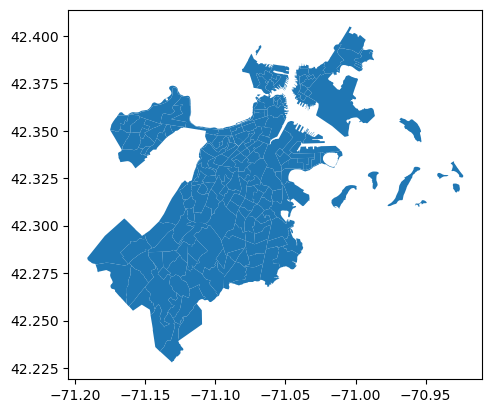

In [4]:
map_df.plot()

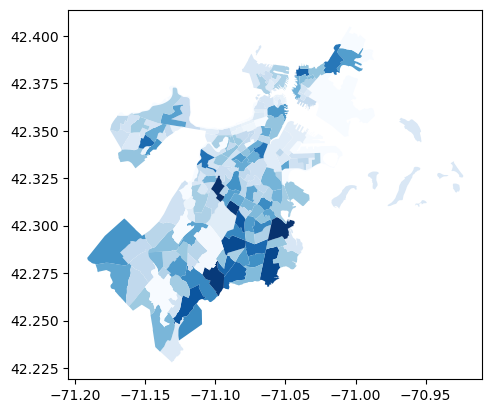

In [5]:
map_df.plot(column= 'TotDis', cmap = "Blues")


In [7]:
def get_series(df, col, threshold, string_other='OTHER'):
    count_incidents=df[col].value_counts()
    mask = count_incidents > threshold
    tail_prob = count_incidents.loc[~mask].sum()
    count_incidents = count_incidents.loc[mask]
    count_incidents[string_other] = tail_prob
    return count_incidents    

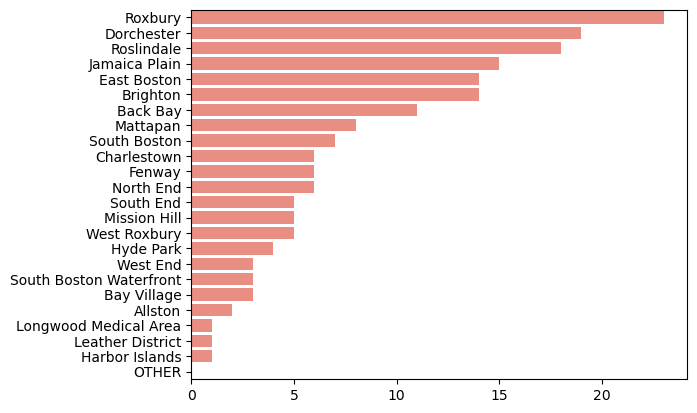

In [14]:
incidents=get_series(map_df,'Name', 0)
sns.barplot(y=incidents.index, x=incidents.values, color="salmon")

In [17]:
map_with_rox = map_df.copy()

rox_yes = []

for i in map_with_rox['Name']:
    if i == 'Roxbury':
        rox_yes.append(1)
    else:
        rox_yes.append(0)



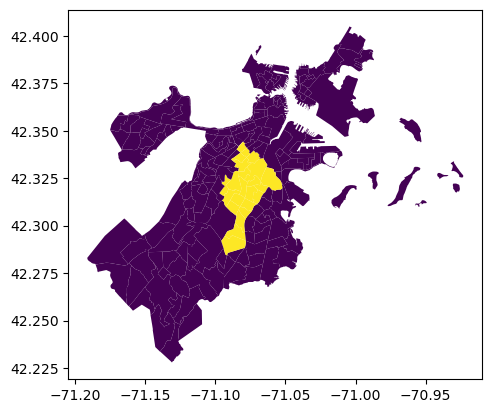

In [19]:
map_with_rox['Rox'] = rox_yes

map_with_rox.plot(column= 'Rox')

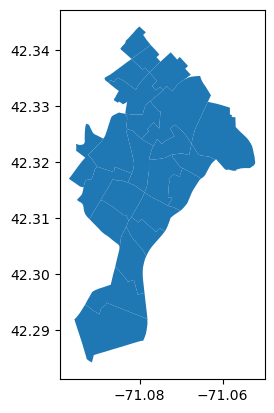

In [15]:
map_rox = map_df.loc[map_df['Name'] == 'Roxbury']

map_rox.plot()

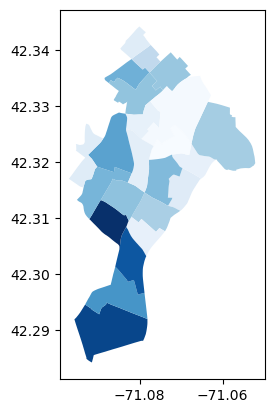

In [29]:
map_rox.plot(column= 'TotDis', cmap = 'Blues')